In [1]:
import numpy as np
import matplotlib.pylab as plt
import uproot
import awkward as ak

In [2]:
import sys
print(sys.executable)

c:\Users\bents\AppData\Local\Programs\Python\Python313\python.exe


<span style="font-family: Comic Sans MS; font-size:25px; color:orange">

Open Root File

In [3]:
# load root file

infile_name = 'TB_FIRE_1101_hits.root'
infile = uproot.open(infile_name)

In [4]:
# get headings

print(type(infile))
keys = infile.keys()
print(keys)

hits = infile['Hits']
print(type(hits))
hits.show()

<class 'uproot.reading.ReadOnlyDirectory'>
['Hits;1']
<class 'uproot.models.TTree.Model_TTree_v20'>
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
TLU_number           | uint64_t                 | AsDtype('>u8')
timestamp            | std::vector<uint64_t>    | AsJagged(AsDtype('>u8'), he...
plane_ID             | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
ch_ID                | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
amplitude            | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
toa                  | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...


In [5]:
# expand branches within headings(keys) 

# branches = infile['Hits'].keys()
branches = hits.keys()

for branch in branches:
    print(f"{branch:20s} {infile['Hits'][branch]}")

# extract specific branch
pt = infile['Hits']['TLU_number']
pt

TLU_number           <TBranch 'TLU_number' at 0x026b90f4b770>
timestamp            <TBranchElement 'timestamp' at 0x026b91150c20>
plane_ID             <TBranchElement 'plane_ID' at 0x026b9117ca50>
ch_ID                <TBranchElement 'ch_ID' at 0x026b9117cb90>
amplitude            <TBranchElement 'amplitude' at 0x026b91161480>
toa                  <TBranchElement 'toa' at 0x026b911615b0>


<TBranch 'TLU_number' at 0x026b90f4b770>

<span style="font-family: Comic Sans MS; font-size:25px; color:orange">

Read Data In Root File Using Awkward

In [6]:
# hits['ch_ID'].array(entry_start=10, entry_stop=20)
plane_array = hits['plane_ID'].array()
len(plane_array[63])

45

In [7]:
# sort all the characters of the run in arrays
tlu = hits['TLU_number'].array()
amp = hits['amplitude'].array()
toa = hits['toa'].array()
time = hits['timestamp'].array()
plane = hits['plane_ID'].array()
channel = hits['ch_ID'].array()

<span style="font-family: Comic Sans MS; font-size:25px; color:orange">
Deal with events and hits

In [8]:
# print some important characterisics and and present the data for different events
# notice that all arrays are of the same length
print(len(tlu))
print(tlu[10:20],"\n", amp[10:20],"\n", plane[10:20],"\n", channel[10:20])

2356797
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19] 
 [[35, 132, 85, 65, 247, 154, 150, 90, ..., 30, 36, 35, 291, 28, 22, 34], ...] 
 [[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ..., 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7], ...] 
 [[5, 104, 121, 122, 124, 125, 144, ..., 164, 185, 143, 144, 164, 143, 144], ...]


In [9]:
# look at a single event
print(len(amp[10]),'\n',len(plane[10]),"\n",len(channel[10]))
print(tlu[10],"\n amplitude:", amp[10],"\n plane", plane[10],"\n channel", channel[10])

41 
 41 
 41
10 
 amplitude: [35, 132, 85, 65, 247, 154, 150, 90, 44, ..., 83, 30, 36, 35, 291, 28, 22, 34] 
 plane [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ..., 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7] 
 channel [5, 104, 121, 122, 124, 125, 144, 145, ..., 164, 185, 143, 144, 164, 143, 144]


In [10]:
# create triplets of for each hit
triplets = ak.zip({"amp":amp[10], "plane":plane[10], "ch":channel[10]}).show()
# triplets = ak.zip([amp[10], plane[10], channel[10]]).show()


[{amp: 35, plane: 0, ch: 5},
 {amp: 132, plane: 0, ch: 104},
 {amp: 85, plane: 0, ch: 121},
 {amp: 65, plane: 0, ch: 122},
 {amp: 247, plane: 0, ch: 124},
 {amp: 154, plane: 0, ch: 125},
 {amp: 150, plane: 0, ch: 144},
 {amp: 90, plane: 0, ch: 145},
 {amp: 44, plane: 0, ch: 164},
 {amp: 11, plane: 1, ch: 123},
 ...,
 {amp: 107, plane: 5, ch: 125},
 {amp: 83, plane: 5, ch: 143},
 {amp: 30, plane: 5, ch: 164},
 {amp: 36, plane: 5, ch: 185},
 {amp: 35, plane: 6, ch: 143},
 {amp: 291, plane: 6, ch: 144},
 {amp: 28, plane: 6, ch: 164},
 {amp: 22, plane: 7, ch: 143},
 {amp: 34, plane: 7, ch: 144}]


<span style="font-family: Comic Sans MS; font-size:25px; color:orange">
Introducing "Awkward" library

[39, 27, 183, 73, 435, 83, 38, 63, 32, ..., 70, 56, 107, 53, 356, 61, 29, 67]


Text(0, 0.5, 'Counts')

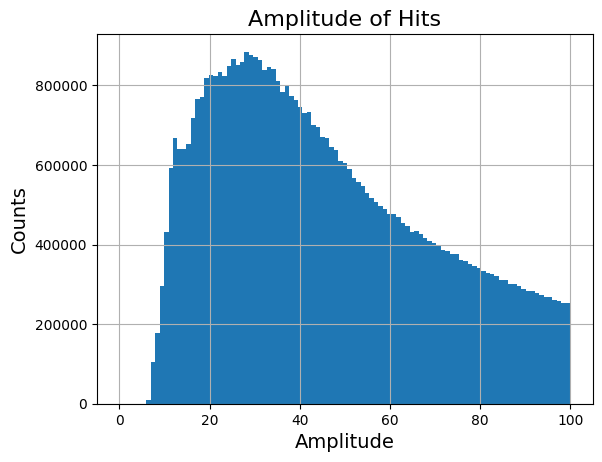

In [11]:
# creating an hitsogram using ak flattening



print(ak.flatten(amp))
plt.figure()
plt.hist(ak.flatten(amp),bins=101,range=(0,100))
# plt.hist(ak.flatten(amp),bins=100)
plt.grid()
plt.title('Amplitude of Hits',fontsize=16)
plt.xlabel('Amplitude',fontsize=14)
plt.ylabel('Counts',fontsize=14)


In [12]:
# use awkward to show all compbinations (permutations) to organize elements from an array in n sized list
a = ak.Array([1,2,3,4,5])
n = 3
ak.combinations(a, n, axis=0).show()

print()

# can also work simultaneousley on different sized sub arrays
b = ak.Array([[1,2,3,4], [20,40,50], [5,6], []])
ak.combinations(b, n).show()

[(1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 5),
 (2, 3, 4),
 (2, 3, 5),
 (2, 4, 5),
 (3, 4, 5)]

[[(1, 2, 3), (1, 2, 4), (1, 3, 4), (2, 3, 4)],
 [(20, 40, 50)],
 [],
 []]


In [13]:
# create a set of values (x and y)
c = ak.Array([[1,2,3],[40,50]])
ak.combinations(c, 2, fields=["x", "y"]).show()

[[{x: 1, y: 2}, {x: 1, y: 3}, {x: 2, y: 3}],
 [{x: 40, y: 50}]]


In [14]:
# unzip on awkward
numbers = ak.Array([[1, 2, 3], [], [5, 7], [11]])
letters = ak.Array([["a", "b"], ["c"], ["d"], ["e", "f"]])
notes = ak.Array([["la", "mi"], ["ci"], ["do"], ["re", "fa"]])

trios = ak.cartesian((numbers, letters,notes))
# print(trios)
trios.show()
print()

numbers,letters,notes = ak.unzip(trios)
print(numbers)
print()
print(letters)
print()
print(notes)


[[(1, 'a', 'la'), (1, 'a', 'mi'), (...), ..., (3, 'b', 'la'), (3, 'b', 'mi')],
 [],
 [(5, 'd', 'do'), (7, 'd', 'do')],
 [(11, 'e', 're'), (11, 'e', 'fa'), (11, 'f', 're'), (11, 'f', 'fa')]]

[[1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3], [], [5, 7], [11, 11, 11, 11]]

[['a', 'a', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'a', 'b', 'b'], ..., ['e', ...]]

[['la', 'mi', 'la', 'mi', 'la', 'mi', ..., 'mi', 'la', 'mi', 'la', 'mi'], ...]


In [15]:
ak.zip({"number":numbers,"letter":letters,"note":notes}).show()
print()
ak.zip([numbers,letters,notes]).show()

[[{number: 1, letter: 'a', note: 'la'}, ..., {number: 3, letter: 'b', ...}],
 [],
 [{number: 5, letter: 'd', note: 'do'}, {number: 7, letter: 'd', ...}],
 [{number: 11, letter: 'e', note: 're'}, ..., {number: 11, letter: 'f', ...}]]

[[(1, 'a', 'la'), (1, 'a', 'mi'), (...), ..., (3, 'b', 'la'), (3, 'b', 'mi')],
 [],
 [(5, 'd', 'do'), (7, 'd', 'do')],
 [(11, 'e', 're'), (11, 'e', 'fa'), (11, 'f', 're'), (11, 'f', 'fa')]]


In [16]:
one = ak.Array([[1.1, 2.2, 3.3], [], [4.4, 5.5], [6.6],])
two = ak.Array([["a", "b", "c"], [], ["d", "e"], ["f"]])


In [17]:
three = ak.Array([100,200,300,400])
ak.zip([one,two,three]).show()

[[(1.1, 'a', 100), (2.2, 'b', 100), (3.3, 'c', 100)],
 [],
 [(4.4, 'd', 300), (5.5, 'e', 300)],
 [(6.6, 'f', 400)]]


In [18]:
three = ak.Array([[],200,300,400])
ak.zip([one,two,three],depth_limit=1).show()

[([1.1, 2.2, 3.3], ['a', 'b', 'c'], []),
 ([], [], 200),
 ([4.4, 5.5], ['d', 'e'], 300),
 ([6.6], ['f'], 400)]
